# ESMCMC: Richness-Mass Scaling Relation Calibration

---
**License**

 ESMCMC_RM_SR_Models

 Mon Nov 11 10:30:00 2024\
 Copyright  2024\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 ESMCMC_RM_SR_Models\
 Copyright (C) 2024 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Settings

In [1]:
import sys
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/Scripts")
from esmcmc_rm_relation_script import catalog_fit, esmcmc


#NumCosmo
from numcosmo_py import Ncm, Nc, GObject
Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())
from richness_mass_calib import create_richness_mass_calib

#Useful packages
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

#GCR Catalogs
sys.path.insert(0, "/global/homes/c/cinlima/gcr-catalogs")
import GCRCatalogs
GCRCatalogs.set_root_dir_by_site("nersc")

#Corner plots 
from getdist import plots
from getdist.mcsamples import  MCSamples
import getdist
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

import pygtc
from IPython.display import display, Math
%matplotlib inline


import warnings


GetDist Version: 1.5.3, Matplotlib version: 3.10.0


## Data

In [2]:
RICH_CUT = 5
MASS_CUT = 0

In [3]:
cDC2 = Table.read('../CatalogsMatching/match_ID.fits').to_pandas()

rich_data = cDC2["richness"]
z_data = cDC2["redshift"]
mass_data = cDC2["halo_mass"]

cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))

#Data cut:
cDC2_data = cDC2_data[cDC2_data['richness'] > RICH_CUT]
cDC2_data = cDC2_data[cDC2_data['mass'] > MASS_CUT]

print(f'Catalog info:\nCatalog size: {len(rich_data)}\nRichness: min: {min( rich_data):.2f}; max: {max(rich_data):.2f}.\nRedshift: min: {min( z_data):.2f}; max: {max(z_data):.2f}.\nMass: min: {min( mass_data):.2}; max: {max(mass_data):.2}.\n')

richness_dt = cDC2_data['richness']
mass_dt = cDC2_data['mass']

print(f'Cut data:\nCatalog size: {len(cDC2_data)}.\nRichness: min: {min(richness_dt):.2f}; max: {max(richness_dt):.2f}\nMass: min: {min( mass_dt):.2}; max: {max(mass_dt):.2}.')


Catalog info:
Catalog size: 31692
Richness: min: 5.01; max: 266.30.
Redshift: min: 0.08; max: 1.20.
Mass: min: 1e+13; max: 1.9e+15.

Cut data:
Catalog size: 31692.
Richness: min: 5.01; max: 266.30
Mass: min: 1e+13; max: 1.9e+15.


## Quadratic Model MCMC

In [ ]:
# N_WALKERS = 1200
# N_RUN = 200
# MODEL = 'ext'
# FILE_NAME = ""+MODEL+".fits"

# esmcmc(cDC2_data, N_WALKERS, N_RUN, MODEL, FILE_NAME, np.log(RICH_CUT))


## Linear Model MCMC

In [ ]:
# N_WALKERS = 1200
# N_RUN = 200
# MODEL2 = 'asc'
# FILE_NAME2 ="full_data_set_mcmc/"+MODEL2+".fits"

# esmcmc(cDC2_data, N_WALKERS, N_RUN, MODEL2, FILE_NAME2)

## Bayes Factor

Given two models $M_{1}$ and $M_2$, with parameters vectors $\theta_{1}$ and $\theta_{2}$, for a oberved data D, the Bayes Factor is defined as (see [Kass and Raftery, 1995](https://sites.stat.washington.edu/raftery/Research/PDF/kass1995.pdf]) and [John and Narlikar, 2002](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.65.043506), for more details):

$$
BF = \frac{P(D|M_{1})}{P(D|M_{2})} =  \frac{\int d\theta_{1} P(D|\theta_{1}, M_{1}) P(\theta_{1}, M_{1}) }{\int d\theta_{2} P(D|\theta_{2}, M_{2}) P(\theta_{2}, M_{2})}. 
$$

Where, $P(D|M_{1})$ and $P(D|M_{2})$ are the likelihood and, $P(\theta_{1}, M_{1})$ and $P(\theta_{2}, M_{2})$ are the priors for parameters $\theta_{1}$ and $\theta_{2}$.


BF interpretation, according to Kass and Raftery, 1995:

$\log_{10}$BF| BF | Strength of evidence|
| --------: | --------: | :------- |
|0 < $\log_{10}$BF < 1/2| 1 < BF < 3.2  |  Not worth more than a bare mention|
| 1/2 < $\log_{10}$BF < 1| 3.2 < BF < 10 |  Substantial|
| 1 < $\log_{10}$BF < 2| 10 < BF < 100| Strong|
| $\log_{10}$BF > 2| BF > 100|  Decisive|







### Bayes Factor (full data set)

In [ ]:
# Bayesian Evidence Quadratic Model:

N_WALKERS1 = 1200
BURNIN1 = 55
FILE_NAME = "full_data_set_mcmc/ext.fits"
mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME, N_WALKERS1 * BURNIN1)
be1, post_lnnorm_sd1 = mcat1.get_post_lnnorm()
# lnevol, glnvol = mcat2.get_post_lnvol(0.6827)

# Bayesian Evidence Linear Model:

BURNIN2 = 55
N_WALKERS2 = 1200
FILE_NAME2 = "full_data_set_mcmc/asc.fits"
mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS2 * BURNIN2)
be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()
# lnevol, glnvol = mcat2.get_post_lnvol(0.6827)

warnings.filterwarnings('ignore')

print(f'BEQ = {be1:.3f} +/- {post_lnnorm_sd1:.3f}.\nBEL = {be2:.3f} +/- {post_lnnorm_sd2:.3f}.\n\nBF = {np.exp(be1 - be2):.3e}.')

warnings.filterwarnings('default')

BEQ - Beyesian evidence - quadratic model.

BEL - Beyesian evidence - linear model.

BF - Bayes factor.

### Analysis using mass and richness thresholds

#### MCMC 

In [ ]:
# RICH_CUT_list = [50]
# MASS_CUT_list = [1e13, 5e13, 8e13, 1e14]

# cDC2 = Table.read('../CatalogsMatching/match_ID.fits').to_pandas()
    
# rich_data = cDC2["richness"]
# z_data = cDC2["redshift"]
# mass_data = cDC2["halo_mass"]
   

# for RICH_CUT in RICH_CUT_list:
#     for MASS_CUT in MASS_CUT_list:

     
#         cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
#         #Data cut:
#         cDC2_data = cDC2_data[cDC2_data['richness'] > RICH_CUT]
#         cDC2_data = cDC2_data[cDC2_data['mass'] > MASS_CUT]
        
#         N_WALKERS = 1200
#         N_RUN = 300
        
#         MODEL = 'ext'
#         FILE_NAME = "mass_richness_cut_2/"+MODEL+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
    
#         esmcmc(cDC2_data, N_WALKERS, N_RUN, MODEL, FILE_NAME, np.log(RICH_CUT))
    
#         MODEL2 = 'asc'
#         FILE_NAME2 = "mass_richness_cut_2/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
    
#         esmcmc(cDC2_data, N_WALKERS, N_RUN, MODEL2, FILE_NAME2, np.log(RICH_CUT))



In [4]:
RICH_CUT_list = [5, 10, 15, 20, 30, 40, 50]
MASS_CUT_list = [1e13, 5e13, 8e13, 1e14]

# RICH_CUT_list = [20]
# MASS_CUT_list = [1e14]

mcmc_list = []
for mcut in MASS_CUT_list:

    for rcut in RICH_CUT_list:
        
        N_WALKERS = 1200
        N_RUN = 300
        BURNIN = 0
        
        RICH_CUT = rcut
        MASS_CUT = mcut
        
        MODEL = 'ext'
        FILE_NAME1 = "mass_richness_cut_2/"+MODEL+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"    
        
        MODEL2 = 'asc'
        FILE_NAME2 = "mass_richness_cut_2/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
        
        mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * BURNIN)             
        
    
        mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS * BURNIN)
        
        mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * BURNIN)
        mset1 = mcat1.get_mset()

        bn1 = mcat1.peek_e_mean_stats().estimate_const_break(0) + 5
        bn2 = mcat2.peek_e_mean_stats().estimate_const_break(0) + 5

        mcmc_list.append([bn1, bn2, rcut, mcut])



In [5]:
bef = pd.DataFrame(data = {'Min_Mass':[], 'Min_Richness': [], 'BEQ': [], 'BEQ Err': [], 'BEL': [], 'BEL Err': [], 'BF': [], 'muM2': [], 'sd_muM2': []})

for item in mcmc_list:

    BN_ext, BN_asc, RICH_CUT, MASS_CUT = item
    
    N_WALKERS = 1200
    N_RUN = 300
               
    MODEL = 'ext'
    FILE_NAME1 = "mass_richness_cut_2/"+MODEL+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"    
        
    MODEL2 = 'asc'
    FILE_NAME2 = "mass_richness_cut_2/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
        
    mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * BN_ext)             
    be1, post_lnnorm_sd1 = mcat1.get_post_lnnorm()
    
    mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS * BN_asc)
    be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()

    mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * BN_ext)
    mset1 = mcat1.get_mset()
   
    muM2 = mcat1.get_bestfit_row().dup_array()[4]
    sd_muM2 = mcat1.peek_pstats().get_sd(4) 

    bf = np.exp(be1 - be2)
        
    bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':MASS_CUT, 'Min_Richness': RICH_CUT,  'BEQ': be1, 'BEQ Err': post_lnnorm_sd1, 'BEL': be2, 'BEL Err':post_lnnorm_sd2, 'BF': bf, 'muM2':muM2, 'sd_muM2': sd_muM2}])], ignore_index=True)
    


#### Results

In [9]:
bef_list = []

for m in MASS_CUT_list:

    bef_list.append(bef[bef['Min_Mass'] == m])


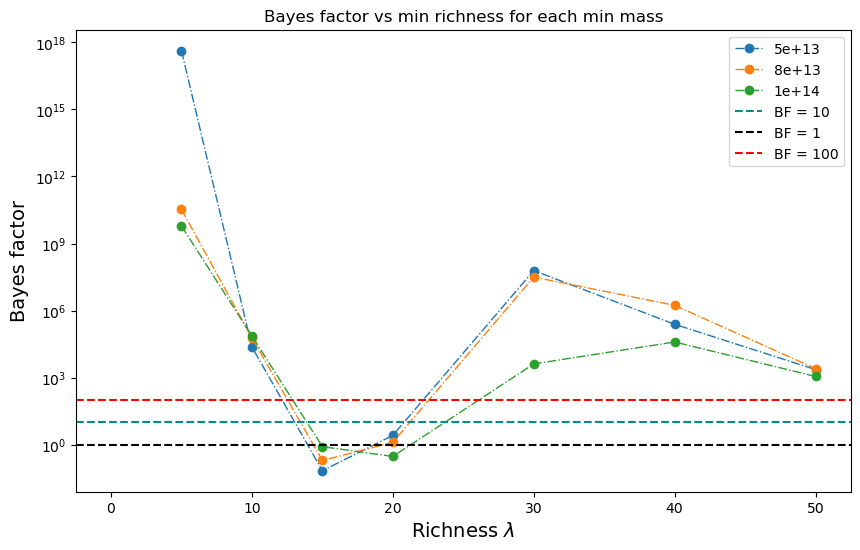

In [23]:
plt.figure(figsize=(10,6))

for i in range(1,4):

    plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["BF"], label = f'{MASS_CUT_list[i]:.2}', ls = '-.', linewidth = 1.0, marker = 'o')
    plt.yscale("log")
        
plt.axline((0, 10), (50, 10), c = 'darkcyan', ls= '--', label = 'BF = 10')
plt.axline((0, 1), (50, 1), c = 'k', ls= '--', label = 'BF = 1')
plt.axline((0, 100), (50, 100), c = 'r', ls= '--', label = 'BF = 100')
plt.legend()

plt.ylabel('Bayes factor', fontsize=14)
plt.xlabel(r'Richness $\lambda$', fontsize=14)
plt.title('Bayes factor vs min richness for each min mass' )

plt.show()

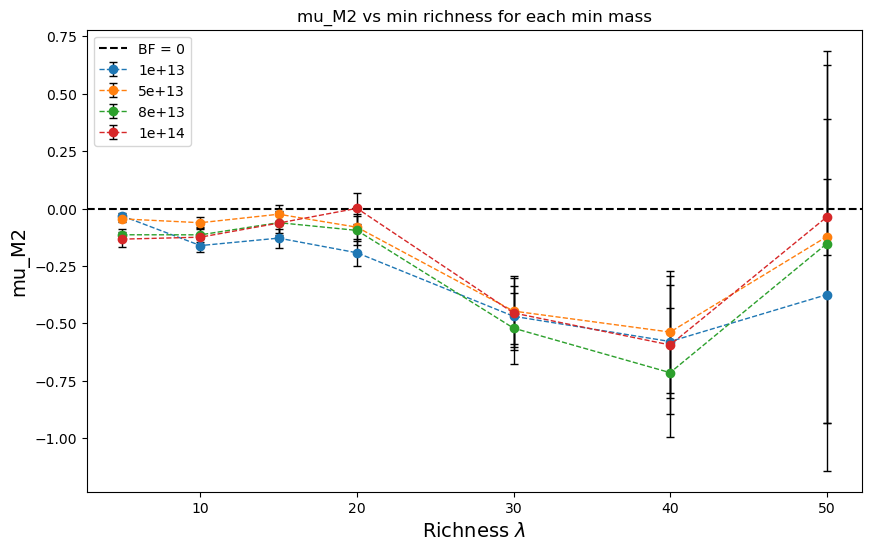

In [27]:
plt.figure(figsize=(10,6))

for i in range(0,4):
    # plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["muM2"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o')
    # plt.yscale("log")
    plt.errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["muM2"], yerr= bef_list[i]["sd_muM2"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, marker = 'o',  label = f'{MASS_CUT_list[i]:.2}')
    plt.ylabel('mu_M2', fontsize=14)
    plt.xlabel(r'Richness $\lambda$', fontsize=14)
    plt.title('mu_M2 vs min richness for each min mass' )

plt.axline((5, 0.0), (50, 0.0), c = 'k', ls= '--', label = 'BF = 0')   
plt.legend()

plt.show()

## Corner plots

In [ ]:
data_fit_full = pd.DataFrame(fits.open("full_data_set_mcmc/asc.fits")[1].data).iloc[:, 1:7].T
data_fit_void = np.array(data_fit_full)
data_fit = []
for item in data_fit_void:
    arr= np.array(item)
    data_fit.append(np.asarray(arr.tolist()))

names = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
]
labels=[r"\mu_{0}", r"\mu_{1}", r"\mu_{2}", r"\sigma_{0}", r"\sigma_{1}", r"\sigma_{2}"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
samples1 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
samples1.removeBurn(0.3)

In [ ]:
# Triangle plot
g1 = plots.get_subplot_plotter()

g1.settings.legend_fontsize = 18
g1.settings.lab_fontsize = 25
g1.settings.axes_fontsize = 20


g1.triangle_plot(
    [samples1],
    filled=True,
    contour_ls="-",
    contour_lws=1,
    fontsize=14,
    fine_bins=1,
    colors=['red'],
    line_args=[{'lw':1.2,'ls':'-', 'color':'red'}],
    legend_labels=["Ascaso"],
)

plt.show()
for i in range(1, 7):
    display(Math(samples1.getInlineLatex(str(i),limit=1)))
# plt.savefig('mcmc3.png')



In [ ]:
data_fit_full = pd.DataFrame(fits.open("full_data_set_mcmc/ext.fits")[1].data).iloc[:, 1:13].T
data_fit_void = np.array(data_fit_full)
data_fit = []
for item in data_fit_void:
    arr= np.array(item)
    data_fit.append(np.asarray(arr.tolist()))

names = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '10',
    '11',
    '12'
]
labels=[r"\mu_0", r"\mu_{M1}", r"\mu_{M2}", r"\mu_{Z1}",r" \mu_{Z2}", r"\mu_{MZ}", r"\sigma_0", r"\sigma_{M1}", r"\sigma_{M2}", r"\sigma_{Z1}", r"\sigma_{Z2}", r"\sigma_{MZ}" ]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
samples2 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
samples2.removeBurn(0.3)


In [ ]:
# Triangle plot
g2 = plots.get_subplot_plotter()

g2.settings.lab_fontsize = 40
g2.settings.legend_fontsize = 40
g2.settings.axes_fontsize = 30

g2.triangle_plot(
    [samples2],
    filled=True,
    contour_ls="-",
    contour_lws=1,
    fine_bins=1,
    colors=['#b186f1'],
    fontsize=70,
    line_args=[{'lw':1.2,'ls':'-', 'color':'#b186f1'}],
    legend_labels=["Estendido", ],
)
#plt.savefig('mcmc.png')
plt.show()


In [ ]:
for i in range(1, 13):
    display(Math(samples2.getInlineLatex(str(i),limit=1)))
